<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-vybhavsv/blob/master/R6_NeuralNetworks_Project_2_SVHN_VybhavSV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification of SVHN Using Neural Networks Project 2

---



In [1]:
# Importing necessary library modules
import h5py
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation, BatchNormalization, Dense, Dropout

import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

from sklearn.metrics import classification_report, precision_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, auc, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir('.')
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
# Load SVHN dataset from a h5 file
# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
Y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
Y_test = h5f['y_test'][:]

X_train=h5f['X_train'][:]
X_test=h5f['X_test'][:]
X_val=h5f['X_val'][:]
y_train=h5f['y_train'][:]
y_test=h5f['y_test'][:]
y_val=h5f['y_val'][:]

# Close this file
h5f.close()


In [5]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : "  , X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : "  , y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)
print('\n')
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [6]:
print(x_train, Y_train, '\n')
print(x_test, Y_test)

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

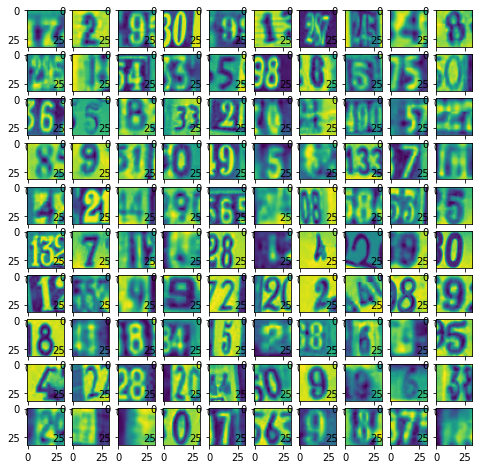

In [7]:
# Visualizing the dataset

w=10
h=10

fig=plt.figure(figsize=(8, 8))

columns = 10
rows = 10

for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    #plt.imshow(img, cmap='gray')
    plt.imshow(img)
plt.show()

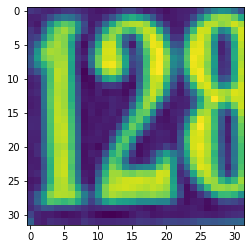

y (training):  2


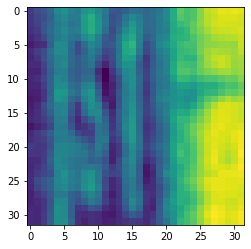

y (validation):  1


In [8]:
plt.imshow(X_train[0])    #Show first image in the training set.
plt.show()
print('y (training): ', y_train[0])

plt.imshow(X_test[0])    #Show first image in the validation set.
plt.show()
print('y (validation): ', y_test[0])

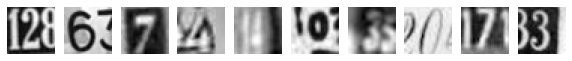

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# Implementing an optimal K-Nearest Neighbour Classifier

In [0]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [0]:
# Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. The denominator should be a float, else the output would become 0.
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val /255

In [12]:
print('Train ', X_train,'\n', 'Test ','\n', X_test, '\n', 'Val ', '\n', X_val)

Train  [[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
 [0.34101608 0.3414451  0.34656274 ... 0.29498273 0.30054745 0.31092745]
 [0.48284313 0.49356118 0.47872823 ... 0.36837214 0.41093138 0.44637334]
 ...
 [0.6042902  0.61100274 0.6149663  ... 0.52993256 0.53592    0.5398412 ]
 [0.8137075  0.8176286  0.8353796  ... 0.83974785 0.8319055  0.820142  ]
 [0.37285647 0.37677765 0.39246237 ... 0.5414914  0.5509529  0.5509529 ]] 
 Test  
 [[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]
 [0.45161137 0.44769022 0.44376904 ... 0.1652502  0.18922432 0.20883021]
 [0.52256864 0.52834475 0.53456783 ... 0.50266707 0.5012169  0.5027937 ]
 ...
 [0.6517247  0.64594865 0.6385533  ... 0.6388313  0.6383843  0.63793725]
 [0.5395208  0.5360466  0.5286514  ... 0.56779647 0.5599541  0.55603296]
 [0.11836078 0.11836078 0.11836078 ... 0.13760431 0.1359851  0.13368313]] 
 Val  
 [[0.17372157 0.18039177 0.20129648 ... 0.0840902  0.08164353 0.07874981]
 [0.2595059  

In [13]:
# We should check the proportion of each class in the target variable to ensure there is no imbalance in the ground truth values.
for i in range(0,10):
    print("Label: {0} | Value % = {1}".format( i, (y_train[y_train == i].size / y_train.size)*100) )

Label: 0 | Value % = 9.966666666666667
Label: 1 | Value % = 9.933333333333334
Label: 2 | Value % = 9.992857142857142
Label: 3 | Value % = 10.192857142857143
Label: 4 | Value % = 9.971428571428572
Label: 5 | Value % = 10.076190476190476
Label: 6 | Value % = 9.923809523809524
Label: 7 | Value % = 9.980952380952381
Label: 8 | Value % = 9.971428571428572
Label: 9 | Value % = 9.99047619047619


From above we can confirm that the dataset is a balanced one.

In [14]:
print(x_train.shape,'\n', x_test.shape)

(42000, 32, 32) 
 (18000, 32, 32)


In [15]:
# As the dataset is very large, the computation involved in finding an optimal value of n-neighbours would take too much time. To make it quick, subsets of smaller size are created and their shapes are as below.

knnX_train = X_train[0:10000, :]
knny_train = y_train[0:10000]
knnX_val = X_val[0:2000, :]
knny_val = y_val[0:2000]

print(knnX_train.shape)
print(knny_train.shape)
print(knnX_val.shape)
print(knny_val.shape)

(10000, 1024)
(10000,)
(2000, 1024)
(2000,)


In [16]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(knnX_train, knny_train)
  score = knn.score(knnX_val, knny_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

k value=1, accuracy score=48.50%
k value=3, accuracy score=64.20%
k value=5, accuracy score=59.65%
k value=7, accuracy score=57.25%
k value=9, accuracy score=57.25%
k value=11, accuracy score=56.15%
k value=13, accuracy score=55.30%
k value=15, accuracy score=55.50%
k value=17, accuracy score=55.20%
k value=19, accuracy score=54.15%
k value=21, accuracy score=53.85%
k value=23, accuracy score=53.45%
k value=25, accuracy score=54.20%
k value=27, accuracy score=54.20%
k value=29, accuracy score=53.55%
k=3 value has highest accuracy of 64.20% on validation data


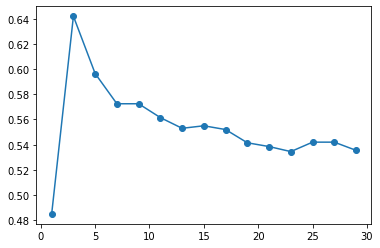

In [17]:
plt.plot(range(1, 30, 2), accuracies, 'o-')

In [0]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=k_vals[i])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Printing Classification Metric Report

In [19]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
[[1234   73   58   66   63   43  106   22   68   81]
 [ 135 1306  104   81   81   34   23   42   12   10]
 [ 154  285  967  112   55   29   25   97   33   46]
 [ 183  302  206  648   67  134   39   33   61   46]
 [ 200  303   65   76 1016   31   50   13   36   22]
 [ 248  192  116  326   76  561   99   16   80   54]
 [ 432  156   80  100  136  156  575    5  169   23]
 [ 162  283  162   89   34   25   21  987   13   32]
 [ 386  162  109  209   95  144  184   11  449   63]
 [ 460  168  124  137   72   84   75   37   78  569]]
              precision    recall  f1-score   support

           0       0.34      0.68      0.46      1814
           1       0.40      0.71      0.52      1828
           2       0.49      0.54      0.51      1803
           3       0.35      0.38      0.36      1719
           4       0.60      0.56      0.58      1812
           5       0.45      0.32      0.37      1768
           6       0.48      0.31      0.38      1832
         

*   The accuracy of the model is 46%.That is not good. The digit 4 and 6 are classified correctly and achieved approx 60% and 50% accuracy respectively.


# Predicting the digits using KNN Classifier

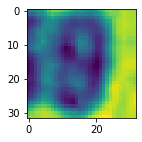

[6]


In [20]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32))
plt.show()
image = X_test[15]
print(knn.predict(image.reshape(1, -1)))

# Implementing Deep Neural Network

In [0]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### Converting output label to multiple values

In [22]:
num_classes=10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [23]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [24]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [25]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

#### Using sgd optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [26]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 60000 samples
Epoch 1/10





42000/42000 [==============================] - 10s 230us/step - loss: 2.2978 - acc: 0.1354 - val_loss: 2.2791 - val_acc: 0.1586
Epoch 2/10
42000/42000 [==============================] - 1s 33us/step - loss: 2.2610 - acc: 0.1881 - val_loss: 2.2413 - val_acc: 0.2072
Epoch 3/10
42000/42000 [==============================] - 1s 32us/step - loss: 2.2148 - acc: 0.2347 - val_loss: 2.1813 - val_acc: 0.2502
Epoch 4/10
42000/42000 [==============================] - 1s 32us/step - loss: 2.1464 - acc: 0.2608 - val_loss: 2.0977 - val_acc: 0.2962
Epoch 5/10
42000/42000 [==============================] - 1s 32us/step - loss: 2.0669 - acc: 0.2884 - val_loss: 2.0057 - val_acc: 0.3172
Epoch 6/10
42000/42000 [==============================] - 1s 33us/step - loss: 1.9831 - acc: 0.3201 - val_loss: 1.9103 - val_acc: 0.3579
Epoch 7/10
42000/42000 [

#### Using adam optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [0]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 48us/step - loss: 1.8383 - acc: 0.3688 - val_loss: 1.4116 - val_acc: 0.5431
Epoch 2/10
42000/42000 [==============================] - 2s 38us/step - loss: 1.2748 - acc: 0.5895 - val_loss: 1.2020 - val_acc: 0.6147
Epoch 3/10
42000/42000 [==============================] - 2s 39us/step - loss: 1.1450 - acc: 0.6380 - val_loss: 1.0673 - val_acc: 0.6693
Epoch 4/10
42000/42000 [==============================] - 2s 38us/step - loss: 1.0314 - acc: 0.6772 - val_loss: 0.9348 - val_acc: 0.7141
Epoch 5/10
42000/42000 [==============================] - 2s 38us/step - loss: 0.9779 - acc: 0.6936 - val_loss: 0.9629 - val_acc: 0.6987
Epoch 6/10
42000/42000 [==============================] - 2s 37us/step - loss: 0.9116 - acc: 0.7155 - val_loss: 0.9060 - val_acc: 0.7154
Epoch 7/10
42000/42000 [==============================] - 2s 38us/step - loss: 0.8526 - acc: 0.7324 - val_loss: 0.8420 - val_acc

* The accuracy of the model on val data is very low either using adam or sgd.

#### Now, try to change the learning rate in SGD optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [30]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 39us/step - loss: 0.7042 - acc: 0.7846 - val_loss: 0.6953 - val_acc: 0.7894
Epoch 2/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6585 - acc: 0.7998 - val_loss: 0.6733 - val_acc: 0.7959
Epoch 3/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6448 - acc: 0.8033 - val_loss: 0.6656 - val_acc: 0.7985
Epoch 4/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6392 - acc: 0.8050 - val_loss: 0.6619 - val_acc: 0.7996
Epoch 5/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6361 - acc: 0.8057 - val_loss: 0.6596 - val_acc: 0.8003
Epoch 6/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6340 - acc: 0.8060 - val_loss: 0.6579 - val_acc: 0.8006
Epoch 7/100
42000/42000 [==============================] - 1s 32us/step - loss: 0.6324 - acc: 0.8068 - val_loss: 0.6566 - 

* The accuracy of the model on val data using sgd with learning rate=0.0001 improved a bit, but not much.

#### Now, let's try to change the learning rate in ADAM optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [31]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 50us/step - loss: 0.6165 - acc: 0.8107 - val_loss: 0.6337 - val_acc: 0.8081
Epoch 2/100
42000/42000 [==============================] - 2s 38us/step - loss: 0.6028 - acc: 0.8160 - val_loss: 0.6194 - val_acc: 0.8115
Epoch 3/100
42000/42000 [==============================] - 2s 38us/step - loss: 0.5953 - acc: 0.8171 - val_loss: 0.6135 - val_acc: 0.8136
Epoch 4/100
42000/42000 [==============================] - 2s 38us/step - loss: 0.5858 - acc: 0.8196 - val_loss: 0.6110 - val_acc: 0.8130
Epoch 5/100
42000/42000 [==============================] - 2s 37us/step - loss: 0.5797 - acc: 0.8212 - val_loss: 0.6012 - val_acc: 0.8168
Epoch 6/100
42000/42000 [==============================] - 2s 38us/step - loss: 0.5733 - acc: 0.8223 - val_loss: 0.5905 - val_acc: 0.8214
Epoch 7/100
42000/42000 [==============================] - 2s 38us/step - loss: 0.5683 - acc: 0.8247 - val_loss: 0.5953 - 

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [32]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 2s 37us/step
Val_acc using simple NN adam :  0.90655


In [33]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.90655


## Implementing batch normalization for training the neural network 

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

#### Adding Batch normalization layer 

In [35]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [36]:
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

#### Using ADAM optimizer.
* learning rate= 0.0001


In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 104us/step - loss: 2.1175 - acc: 0.2605 - val_loss: 2.0477 - val_acc: 0.2987
Epoch 2/100
42000/42000 [==============================] - 3s 75us/step - loss: 1.5768 - acc: 0.4942 - val_loss: 1.5510 - val_acc: 0.5130
Epoch 3/100
42000/42000 [==============================] - 3s 74us/step - loss: 1.3003 - acc: 0.6206 - val_loss: 1.3991 - val_acc: 0.5989
Epoch 4/100
42000/42000 [==============================] - 3s 74us/step - loss: 1.1208 - acc: 0.6859 - val_loss: 1.2923 - val_acc: 0.6286
Epoch 5/100
42000/42000 [==============================] - 3s 74us/step - loss: 0.9868 - acc: 0.7258 - val_loss: 1.1661 - val_acc: 0.6770
Epoch 6/100
42000/42000 [==============================] - 3s 77us/step - loss: 0.8840 - acc: 0.7513 - val_loss: 1.0681 - val_acc: 0.6885
Epoch 7/100
42000/42000 [==============================] - 3s 73us/step - loss: 0.8026 - acc: 0.7734 - val_loss: 1.0473 -

In [39]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 4s 66us/step
Val_acc using Batch ANN adam :  0.8368666666666666


In [40]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.906550
2,NN_Batch_adam,0.836867


## Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [0]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

#### Adding Batch normalization layer  

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [43]:
keras_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

#### Using SGD optimizer
* learning rate =0.0001


In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 111us/step - loss: 2.0923 - acc: 0.2620 - val_loss: 1.9352 - val_acc: 0.3188
Epoch 2/100
42000/42000 [==============================] - 3s 77us/step - loss: 1.5666 - acc: 0.5107 - val_loss: 1.5608 - val_acc: 0.5195
Epoch 3/100
42000/42000 [==============================] - 3s 76us/step - loss: 1.2947 - acc: 0.6275 - val_loss: 1.3360 - val_acc: 0.6103
Epoch 4/100
42000/42000 [==============================] - 3s 77us/step - loss: 1.1130 - acc: 0.6876 - val_loss: 1.1901 - val_acc: 0.6519
Epoch 5/100
42000/42000 [==============================] - 3s 74us/step - loss: 0.9757 - acc: 0.7298 - val_loss: 1.1487 - val_acc: 0.6602
Epoch 6/100
42000/42000 [==============================] - 3s 75us/step - loss: 0.8708 - acc: 0.7537 - val_loss: 1.0202 - val_acc: 0.6946
Epoch 7/100
42000/42000 [==============================] - 3s 76us/step - loss: 0.7881 - acc: 0.7758 - val_loss: 0.9762 -

In [46]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 4s 64us/step
Val_acc using BatchNorm sgd :  0.8357166666666667


In [47]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.906550
2,NN_Batch_adam,0.836867
3,NN_Batch_sgd,0.835717


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

## Implementing batch normalization and Dropout for training the neural network 

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [49]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [50]:
keras_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)              

#### Using ADAM optimizer.
* learning rate= 0.0001

In [0]:
#Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 134us/step - loss: 2.8469 - acc: 0.1003 - val_loss: 2.3252 - val_acc: 0.1003
Epoch 2/100
42000/42000 [==============================] - 3s 83us/step - loss: 2.7254 - acc: 0.1045 - val_loss: 2.3033 - val_acc: 0.1123
Epoch 3/100
42000/42000 [==============================] - 3s 82us/step - loss: 2.6379 - acc: 0.1045 - val_loss: 2.2987 - val_acc: 0.1149
Epoch 4/100
42000/42000 [==============================] - 3s 82us/step - loss: 2.5737 - acc: 0.1034 - val_loss: 2.2963 - val_acc: 0.1172
Epoch 5/100
42000/42000 [==============================] - 3s 81us/step - loss: 2.5310 - acc: 0.1034 - val_loss: 2.2947 - val_acc: 0.1245
Epoch 6/100
42000/42000 [==============================] - 3s 81us/step - loss: 2.4895 - acc: 0.1051 - val_loss: 2.2905 - val_acc: 0.1374
Epoch 7/100
42000/42000 [==============================] - 3s 80us/step - loss: 2.4577 - acc: 0.1056 - val_loss: 2.2880 -

## Testing NN on test data 

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [55]:
keras_model_final.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 113us/step - loss: 2.1891 - acc: 0.2245 - val_loss: 1.9950 - val_acc: 0.3104
Epoch 2/100
42000/42000 [==============================] - 3s 63us/step - loss: 1.6457 - acc: 0.4792 - val_loss: 1.7015 - val_acc: 0.4687
Epoch 3/100
42000/42000 [==============================] - 3s 63us/step - loss: 1.3484 - acc: 0.6178 - val_loss: 1.5007 - val_acc: 0.5639
Epoch 4/100
42000/42000 [==============================] - 3s 64us/step - loss: 1.1504 - acc: 0.6845 - val_loss: 1.3149 - val_acc: 0.6101
Epoch 5/100
42000/42000 [==============================] - 3s 64us/step - loss: 1.0030 - acc: 0.7275 - val_loss: 1.2234 - val_acc: 0.6455
Epoch 6/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.8911 - acc: 0.7561 - val_loss: 1.0967 - val_acc: 0.6773
Epoch 7/100
42000/42000 [==============================] - 3s 64us/step - loss: 0.7982 - acc: 0.7785 - val_loss: 1.0242 -

In [58]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

18000/18000 [==============================] - 1s 68us/step
Test accuracy :  0.7628888888888888


#### Predicting the digits using NN classifier on test data

#### Image 1

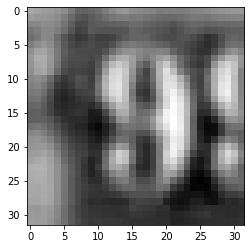

In [59]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [60]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[5]

9

In [61]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 4s 71us/step
Val_acc using BatchNorm and Dropout adam :  0.7238166666666667


In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.906550
2,NN_Batch_adam,0.836867
3,NN_Batch_sgd,0.835717
4,NN_Batch_Drop_adam,0.723817


#### Image 2

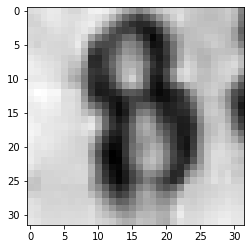

In [63]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [64]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[10]

8

#### Image 3

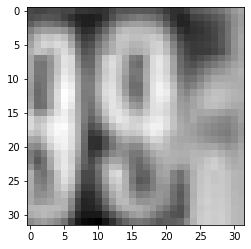

In [65]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [66]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[112]

9

In [67]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[0 7 2 ... 7 9 2]


# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took pretty long time to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* But with the normal NN the accuracy was around 90% and then with Hyper Parameter Tuning , we observed that the accuracy score started to reduce.
* Using NN with BatchNormalization we got 72.4% accuracy. We have predicted the classification of the images correctly.


